In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [104]:
def h(theta,x):
    return sigmoid(x.dot(theta))

In [116]:
ex3data1 = scipy.io.loadmat("ex3data1.mat")
X_ex3data = ex3data1['X']
y_ex3data = ex3data1['y'].reshape(5000)
X_bitmap = X_ex3data.reshape(5000,20,20,order='F')

Let's plot some examples of the data

In [158]:
def plot_digit(n):
    plt.figure()
    plt.imshow(X_bitmap[n],cmap='binary')

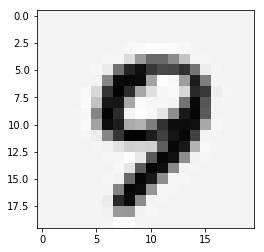

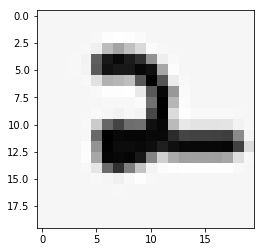

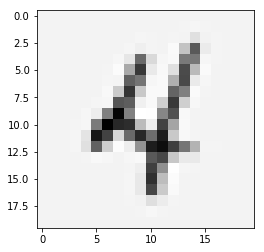

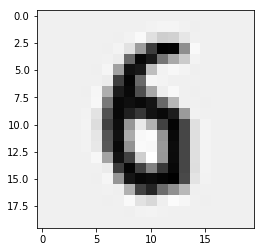

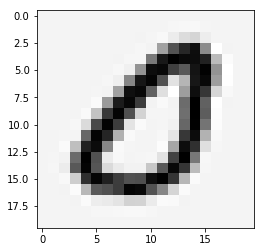

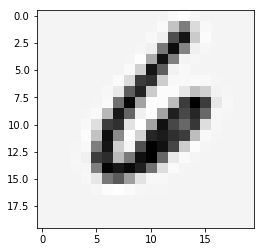

In [106]:
for i in np.random.randint(0,4999,6):
    plt.figure()
    plt.imshow(X_bitmap[i],cmap='binary')

In [107]:
def h(theta,x):
    return scipy.special.expit(x.dot(theta))

In [117]:
def cost(theta,X,y):
    m = X.shape[0]
    return 1/m*(-y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X))))

In [109]:
def cost_gradient(theta,X,y):
    m = X.shape[0]
    return 1/m*(h(theta,X) - y).dot(X)

In [138]:
def cost_reg(theta,X,y,reg_lambda):
    m = X.shape[0]
    log_loss = -y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X)))
    reg_term = 0.5*reg_lambda*np.sum(np.power(theta[1:],2))
    return 1/m*(log_loss + reg_term)

In [139]:
def cost_gradient_reg(theta,X,y,reg_lambda):
    m = X.shape[0]
    theta_tmp = np.insert(theta[1:],0,0)
    return 1/m*((h(theta,X) - y).dot(X) + reg_lambda*theta_tmp)

In [146]:
def one_vs_all(k,X,y,reg_lambda):
    num_features = X.shape[1]
    param_matrix = np.zeros((k,num_features))
    for i in range(1,k+1):
        class_y = np.equal(y,i)
        print("Fitting class " + str(i))
        param_matrix[i-1] = scipy.optimize.fmin_cg(lambda z: cost_reg(z,X,class_y,reg_lambda),
                                                   param_matrix[i-1],
                                                   lambda z: cost_gradient_reg(z,X,class_y,reg_lambda))
    return param_matrix

In [147]:
theta_min_matrix = one_vs_all(10,X_ex3data,y_ex3data,1)

Fitting class 1
Optimization terminated successfully.
         Current function value: 0.027978
         Iterations: 64
         Function evaluations: 224
         Gradient evaluations: 224
Fitting class 2
Optimization terminated successfully.
         Current function value: 0.073193
         Iterations: 100
         Function evaluations: 289
         Gradient evaluations: 289
Fitting class 3
Optimization terminated successfully.
         Current function value: 0.083249
         Iterations: 103
         Function evaluations: 280
         Gradient evaluations: 280
Fitting class 4
Optimization terminated successfully.
         Current function value: 0.053687
         Iterations: 84
         Function evaluations: 253
         Gradient evaluations: 253
Fitting class 5
Optimization terminated successfully.
         Current function value: 0.076876
         Iterations: 117
         Function evaluations: 326
         Gradient evaluations: 326
Fitting class 6
Optimization terminated success

In [145]:
theta_min_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  2.87519446e-05, ...,
         1.28561068e-03,  4.03920264e-09,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.85055888e-05, ...,
         3.21431296e-03, -3.68477998e-04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.58880952e-05, ...,
        -1.70797942e-05, -2.29198748e-07,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -2.30393647e-05, ...,
        -1.29979310e-03,  1.35313799e-04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.56573794e-06, ...,
        -2.50442557e-03,  1.82498260e-04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.66501718e-08, ...,
        -1.50453361e-04,  8.05273779e-06,  0.00000000e+00]])

In [150]:
def one_vs_all_predict(k,theta_matrix,x):
    prob = 0
    pred_class = 0
    for i in range(1,k+1):
        tmp_theta = theta_matrix[i-1]
        tmp_prob = h(tmp_theta,x)
        if(tmp_prob > prob):
            prob = tmp_prob
            pred_class = i
    return pred_class, prob

In [161]:
print(one_vs_all_predict(10,theta_min_matrix,X_ex3data[2000]))
print(one_vs_all_predict(10,theta_min_matrix,X_ex3data[1000]))
print(one_vs_all_predict(10,theta_min_matrix,X_ex3data[3000]))

(4, 0.9200607534442042)
(2, 0.9421668469374825)
(6, 0.9766705410148092)


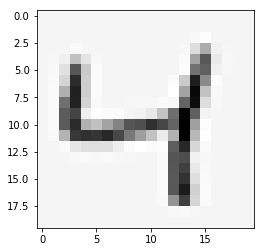

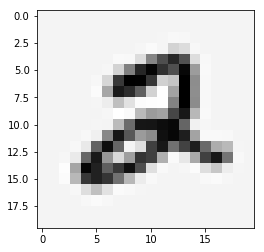

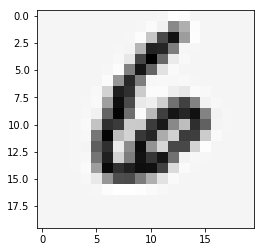

In [162]:
plot_digit(2000)
plot_digit(1000)
plot_digit(3000)